# Sentiment Analysis

## Importing libraries 

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [3]:
data=pd.read_csv('climate_nasa.csv')

## Convert the 'date' into datetime format

In [4]:
data['date']=pd.to_datetime(data['date'],errors='coerce')

## Fill the missing values in commentsCounts with 0

In [8]:
data['commentsCount'].fillna(0, inplace=True)

C:\Users\ganes\AppData\Local\Temp\ipykernel_10304\783920751.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['commentsCount'].fillna(0, inplace=True)


## Initialize VADER sentiment Analyzer

In [9]:
analyzer = SentimentIntensityAnalyzer()

## Apply sentiment analysis on the 'text' column

In [11]:
def get_sentiment(text):
    if isinstance(text, str):
        scores = analyzer.polarity_scores(text)
        if scores['compound'] >= 0.05:
            return 'Positive'
        elif scores['compound'] <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Neutral'  # or handle it as you see fit

data['Sentiment'] = data['text'].apply(get_sentiment)

# Count the sentiment distribution

In [12]:
sentiment_counts = data['Sentiment'].value_counts()

## Plot sentiment distribution

C:\Users\ganes\AppData\Local\Temp\ipykernel_10304\3395314242.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


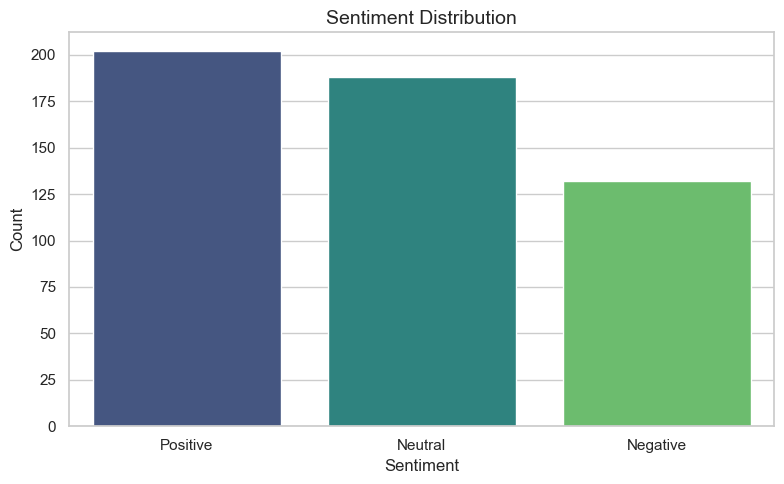

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

## Display a few sample rows with snetiments

In [14]:
print(data[['text', 'Sentiment']].head())

                                                text Sentiment
0  Neat comparison I have not heard it before.\n ...  Positive
1  An excellent way to visualise the invisible! T...  Positive
2  Does the CO2/ghg in the troposphere affect the...  Positive
3  excellent post! I defo feel the difference - o...  Positive
4  Yes, and carbon dioxide does not harm the Eart...  Positive


# Sentiment Trends Over Time

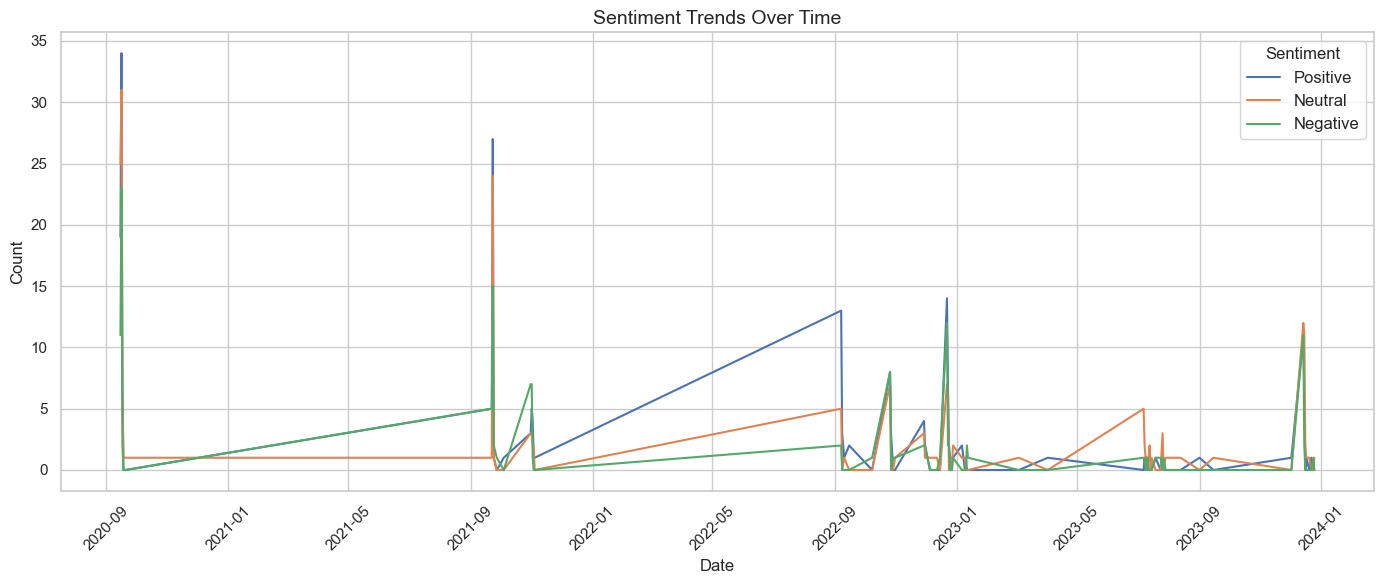

In [15]:
# Aggregate sentiment counts by date
sentiment_trends = data.groupby([data['date'].dt.date, 'Sentiment']).size().reset_index(name='Count')

# Pivot the data for easier plotting
sentiment_pivot = sentiment_trends.pivot(index='date', columns='Sentiment', values='Count').fillna(0)

# Plot sentiment trends over time
plt.figure(figsize=(14, 6))
for sentiment in ['Positive', 'Neutral', 'Negative']:
    if sentiment in sentiment_pivot.columns:
        plt.plot(sentiment_pivot.index, sentiment_pivot[sentiment], label=sentiment)

plt.title('Sentiment Trends Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Sentiment', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Integrating Sentiment Analysis Results into a Machine Learning Model

Mean Squared Error: 162.78
R-squared: 0.09


C:\Users\ganes\AppData\Local\Temp\ipykernel_10304\4151766687.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.feature_importances_, y=X.columns, palette='viridis')


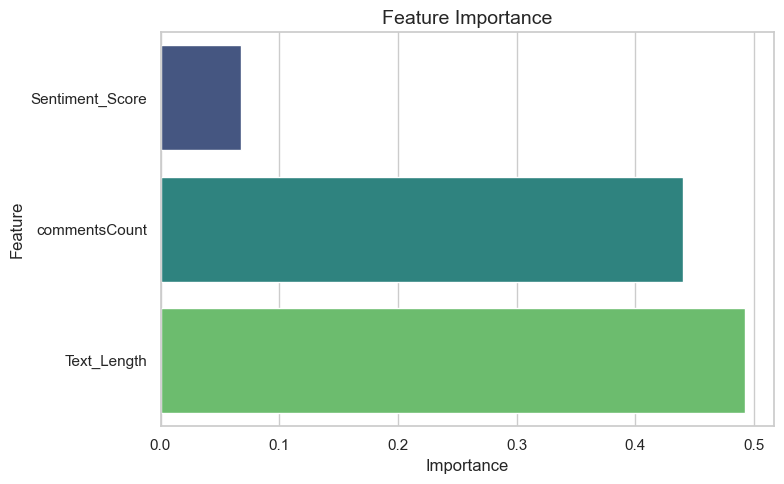

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
data['Sentiment_Score'] = data['Sentiment'].map({'Positive': 1, 'Neutral': 0, 'Negative': -1})
data['Text_Length'] = data['text'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Features and target
X = data[['Sentiment_Score', 'commentsCount', 'Text_Length']]
y = data['likesCount']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Feature importance visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=model.feature_importances_, y=X.columns, palette='viridis')
plt.title('Feature Importance', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()